<a href="https://colab.research.google.com/github/Eman-Adly/projects-NTI/blob/main/Nti_project_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer as simpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns


In [2]:
data=pd.read_csv("/content/imports (1).csv")

In [3]:
data

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [4]:
data.head()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [5]:
data.isnull().sum()

,0
symboling,0
normalized-losses,41
fuel-type,0
aspiration,0
num-of-doors,2
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0
length,0


# DATA **CLEANING**

# 1.Handling missing **valus**

In [6]:
datacleaned=data.dropna()# delet the row missing valu

In [7]:
quantitative=[] #replace data from value
Categorical=[]
for i in data.columns:
  if len(data[i].unique())>10:
      quantitative.append(i)
  else:
    Categorical.append(i)


In [8]:
from sklearn.impute import SimpleImputer as simpleImputer
SI= simpleImputer(strategy="mean")
data[quantitative]=SI.fit_transform(data[quantitative])

In [9]:
SI= simpleImputer(strategy="most_frequent")
data[Categorical]=SI.fit_transform(data[Categorical])

In [10]:
data.isnull().sum()

,0
symboling,0
normalized-losses,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0
length,0


In [11]:
data.shape

(205, 25)

# 2.Removing Duplicates

In [12]:
data.duplicated().sum()

0

In [13]:
#for i in data[length].columns:
  #data[i].plot(kind="box")
  #plt.show()

# 3. Handling Outliers

In [14]:
q1 = data["length"].quantile(0.25)
q3 = data["length"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [15]:
lower_bound

141.10000000000002

In [16]:
upper_bound

208.29999999999995

In [17]:
data_cleaned = data[(data["length"]<upper_bound)& (data["length"]>lower_bound)]

<Axes: >

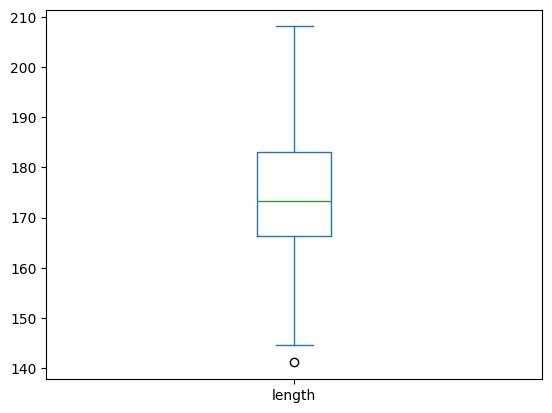

In [18]:
data["length"].plot(kind="box",label = "length")

In [19]:
data_cleaned.shape

(204, 25)

# **Data Transformation**

##  Encoding Categorical variables

In [20]:
non_numerical_colums=data.select_dtypes(exclude=["number"]).columns.tolist()
non_numerical_colums

['symboling',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

# 1.label Encoder

In [21]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()   #traditional machine learning
for i in non_numerical_colums:
  data[i]=LE.fit_transform(data[i])


#from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder()     # deep learning
#data['col'] = encoder.fit_transform(data['col']).toarray()

In [22]:
non_numerical_colums=data.select_dtypes(exclude=["number"]).columns.tolist()
non_numerical_colums

[]

# **Normalization**

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()   # 0:1 KNN SVM
data[quantitative] = scaler.fit_transform(data[quantitative])

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#data['col'] = scaler.fit_transform(data[['col']])


# **Data Reduction**

# 1.Feature Selection

In [24]:
import seaborn as sns

In [25]:
corr = data.corr()
labeld_corr = corr[["price"]].sort_values("price", ascending=False)
labeld_corr

,price
price,1.000000
engine-size,0.861752
curb-weight,0.820825
horsepower,0.757917
width,0.728699
length,0.682986
wheel-base,0.583168
drive-wheels,0.576866
bore,0.532300
fuel-system,0.516533


<Axes: >

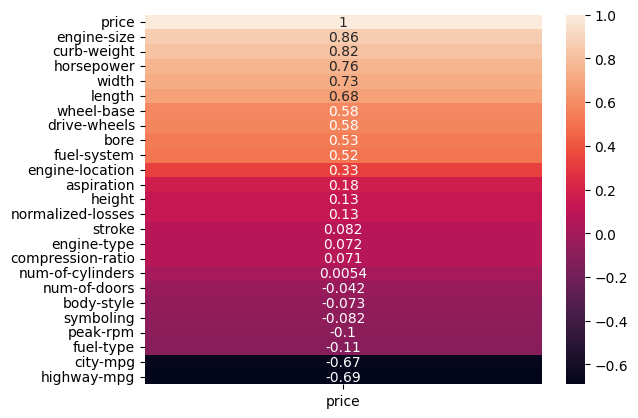

In [26]:
corr = data.corr()
labeld_corr = corr[["price"]].sort_values("price", ascending=False)
labeld_corr
sns.heatmap(labeld_corr, annot=True)
#plt.show()

In [27]:
data.shape

(205, 25)

In [28]:
data.drop(["num-of-cylinders"], axis=1, inplace=True)

In [29]:
data.shape

(205, 24)

<Axes: >

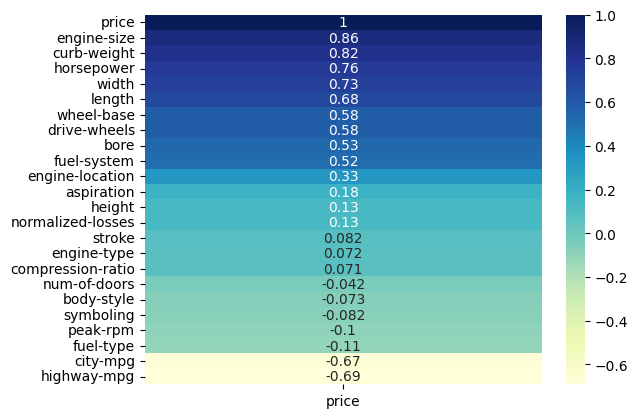

In [30]:
corr = data.corr()
labeld_corr = corr[["price"]].sort_values("price", ascending=False)
labeld_corr
sns.heatmap(labeld_corr, annot=True,cmap="YlGnBu")
#plt.show()

# **Splitting the Dataset**

In [31]:
y = data["price"]
x = data.drop("price",axis=1 )

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
x_train.shape

(164, 23)

In [34]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [35]:
y_pred = model.predict(x_test)

In [36]:
pd.DataFrame({"Actual":y_test,"Predicted":y_pred}).head(10)

,Actual,Predicted
15,0.636562,0.467367
9,0.200813,0.229107
100,0.110000,0.109794
132,0.167122,0.206990
68,0.574202,0.469536
95,0.066556,0.040691
159,0.066283,0.061045
162,0.102775,0.053262
147,0.126111,0.107857
182,0.065960,0.047246


In [37]:
from sklearn.metrics import mean_squared_error
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

MSE: 0.011101545132104835


# **Diminsionality** **Reduction**

# PCA

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(x_train)

PCA(n_components=10)

In [39]:
#PCA is an unsupervised algorithm
data_cleaned = data - data.mean()
cov_matrix = np.cov(data_cleaned, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

In [40]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

In [41]:
n_components  = 10
principal_components = sorted_eigenvectors[:, :n_components]

In [42]:
projected_data = np.dot(data_cleaned, principal_components)

In [43]:
data.shape

(205, 24)